[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


                                              review sentiment
0  plot : two teen couples go to a church party ,...       neg
1  the happy bastard's quick movie review \ndamn ...       neg
2  it is movies like these that make a jaded movi...       neg
3   " quest for camelot " is warner bros . ' firs...       neg
4  synopsis : a mentally unstable man undergoing ...       neg

Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       199
           1       0.82      0.80      0.81       201

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400


Confusion Matrix:


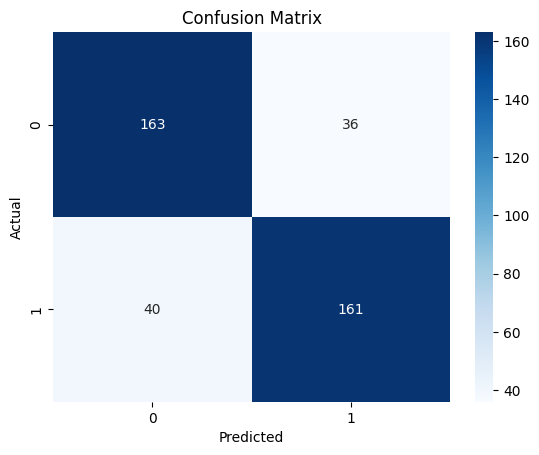

In [1]:
# Task 2 - Sentiment Analysis with NLP
# Internship Task: EliteTech ML Internship

# Step 1: Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Download and load dataset (NLTK movie_reviews dataset)
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews

# Create a list of documents and labels
docs = []
labels = []

for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        docs.append(movie_reviews.raw(fileid))
        labels.append(category)

# Convert to DataFrame
df = pd.DataFrame({'review': docs, 'sentiment': labels})
print(df.head())

# Step 3: Preprocess text (lowercase, remove special characters)
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_review'] = df['review'].apply(preprocess)

# Step 4: Encode target labels
df['sentiment'] = df['sentiment'].map({'pos': 1, 'neg': 0})

# Step 5: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review']).toarray()
y = df['sentiment']

# Step 6: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
